<a href="https://colab.research.google.com/github/philliewright/freedom_status_media_tonality/blob/main/freedom_status_media_tonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Can we combine GDELT events data and Freedom House Data to predict whether news is positive or negative based on the country's freedom status and who the articles are about?

## 1 Introduction

Information in the world today has a hugr part to play in driving narratives and global politics and the media play a huge part in shaping these narratives. Media outlets, both independent and governemnt controlled have a huge influence on the people that engage with them. We want to investigate what factors makes up these narratives and wether the nature of these narratives can be predicted.

Understanding this is an important step given the amount of control over narratives and public perceptions, the rise of dis/misinformation campaigns and the increased polarisation in politics. We believe a tool such as the one explored here, where we leverage big data and machine learning to understand patterns and correlations of news produced, could be instrumental in effectively understanding why global politics is in the state it is today and how it might look in the future.

This project looks at how we can explore the tonality of the narratives on news based on parameters such as the freedom status of the country, the nature of the event, the subjects of the event and more. We belive that this could provide real time insights to governments and news outlets to understnad unerlying current events and perceptions across the world and how they are being spun and reported.

## 2 Objectives
The main objective of this project is to analyse whether there is a relationship between the freedom status of a country and the tonality of news articles produced depending on the type of event and countries involved.

The freedom status is taken from Freedom House's Freedom Index [1] which categorises countries based on analysis of their political and civil rights. We also leverage a subset of the GDELT events dataset from Google BigQuery [2] which allows us to investigate the news narratives. We will use these to understand how entities and actors involced in an event can potentially influence the sentiment (tonality) of the news produced.

Although this project is an academic one, it could ahve substantial real world value for Government and policy makers who can better understand how the news produced is influenced by the state of the country itself and could help with policy and decision making in the future. Perhaps one day helping to encourage a less polarised world than the one we live in today.

## 3 Data
The two datasets used are as follows

1. **GDELT Events data:** The GDELT project is an archive of news and broadcasts from around the world which updated every 15 minutes. The data includes many features such as geographoical data, event codes, actors involved and url of the news source. These details allow for in depth analysis into global news production. Some features included are:
  - **Actor Codes** which represent the primary and secondary actors involved in an event along with their roles. This could reveal how different actors are percieved in different countries/ media outlets
  - **Geographical Coordinates** for both the events and the actors which could help uncover any regional bias or changes in news coverage
  - **Event COdes** which categorise the nature of the events covered
  - **News outlet country** is a feature created in the report based on the url of the news produced

An example of the BigQuery query run is shown below, for Free Countries it was::
``` free
  SELECT *
  FROM `gdelt-bq.gdeltv2.events`
  WHERE (Actor1CountryCode IN (
          'AND', 'ARG', 'AUS', 'AUT', 'BHS', 'BRB',
          'BEL', 'BLZ', 'BWA', 'BRA', 'CAN', 'CHL', 'CHN',
          'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'DMA',
          'EST', 'FJI', 'FIN', 'FRA', 'DEU', 'GRC', 'GRD',
          'GUY', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JAM',
          'JPN', 'KIR', 'LVA', 'LBR', 'LTU', 'LUX', 'MLT',
          'MHL', 'MUS', 'FSM', 'MCO', 'MNG', 'NLD', 'NZL',
          'NOR', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL',
          'POL', 'PRT', 'RWA', 'WSM', 'SMR', 'STP', 'SYC',
          'SGP', 'SVK', 'SVN', 'SLB', 'ZAF', 'KOR', 'ESP',
          'SWE', 'CHE', 'TWN', 'TLS', 'TON', 'TTO', 'TUV',
          'GBR', 'USA', 'URY', 'VUT'
      )
  )

  AND Actor2CountryCode IS NOT NULL
  LIMIT 50000;

```  
You can access the data via the HDFS code below on Lena or use the data saved here: https://drive.google.com/drive/folders/1Q9eQHTF6wpk3rKiMMXP6YnCbQXkQ9B5C?usp=sharing

2. **Freedom House Data** This is an annual report intent on understnading the freedom status of countries by categorising them into 3 groups 'free', 'partially free' and 'not free'. We are aiming to combine this dataset with the Big Data from GDELT in order to examine the intricacies of news tonality and its potential correlation with the freedom status of a country.

## 3 Hypotheses
We have one main hypotheses for this piece of work. This is the hypothesis is that there is a significant relationship between the freedom status of a country and the tonality of news articles about events happening in that country. We will look to explore whether news articles tend to be more positive or negative based on the freedom status of the region they are from.


## 4 Planned Analysis

The planned analysis aimst to analyse and understand these datasets and eventually use these for advacned machine learning. After data preprocessing and cleaning, we intend to perform exploratory data analysis (EDA) to discern trends, distributions, and correlations within the data. This phase will help to in identifying event categories that display consistent associations with certain freedom statuses.

Subsequently, we will implement machine learning techniques to predict freedom status based on event features. Logistic Regression and Boosted classification models will be trained and evaluated, providing a framework to gauge the predictive power of the event data in determining a country's freedom classification.


# 5 Why HDFS and Spark?

It was decided to use HDFS and Apache Spark for this Project (when possible). This is becasue HDFS facilitates both efficient data storage for Big Datasets such as GDELT but it also has scalable architechture which can be leveraged for if this project was to upscale. The distributed environemnt breaks down the large datasets into chunks which are 'distributed' across multiple machines. This means that even if we were to significantly upscale this project, the performance levels can be maintained and the reliability and data integraty kept.

Apache Spark uses in-memory computing to speed up the analytical tasks involved. This allows us to keep a fast rate of analysing compared to other methods with YARN manging the computing resources to ensure there is minimal waste. Spark's Machine Learning library, MLlib is used in our data which has a wide range of algorthms built in.

Using HDFS and Spark alongside yarn means we can leverage the Hadoop computing power with the performance optimisation though spark especially for the computationally expensive tasks such as Principle Component Analysis, especially with as high dimensions as this dataset has. All of this ensures a scalable, reliable, and efficient data pipeline.

# 6 Imports, Retrieving the data and Initialising Spark

Due to technical issues on the Lena server, I was unable to access the Lena cluster for an extended period of time therefore my work was conducted using Google Colab. However, had I been able to access the cluster I would have imported the data from HDFS and utilized the following code:
```
# Initialising the Spark Session
spark = SparkSession.builder.appName("Freedom House and GDELT ML Project").master("yarn").getOrCreate()

# Loading GDELT data

gdelt_free_df = spark.read.csv("hdfs://lena/user/pwrig001/FREE_GDELT.csv", header=True, inferSchema=True)
not_free_gdelt_df = spark.read.csv("hdfs://lena/user/pwrig001/NOT_FREE_GDELT.csv", header=True, inferSchema=True)
partially_free_df = spark.read.csv("hdfs://lena/user/pwrig001/PARTIALLY_FREE_GDELT.csv", header=True, inferSchema=True)

# Union the three DataFrames into a single DataFrame
all_gdelt_df = gdelt_free_df.union(not_free_gdelt_df).union(partially_free_df)

# Load Freedom House data
freedom_house_df = spark.read.csv("hdfs://lena/user/pwrig001/FINAL-FIW13-23_with_CAMEO.csv", header=True, inferSchema=True)


freedom_house_df.printSchema()
all_gdelt_df.printSchema()
```

To proceed with this method please copy and paste this code to replace the Google Colab code below, the data is loaded into the HDFS path provided. Alternatively the data is provided within the zip file.




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pyspark
!pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=b329f324df95b349e696b94ff4f75b480302c1f5195a27bbc8c2f67afc37480d
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 3.0 MB/s eta 0:00:00


In [4]:
from pyspark.sql import SparkSession  # Initiates a SparkSession
from pyspark.sql import Row  # Allows creating rows of data to be parallelised into a DataFrame
from pyspark.sql import functions as F  # Provides access to a wide array of SQL functions to operate on DataFrames
from pyspark.sql.functions import udf, col, count, when, desc, countDistinct  # SQL functions to operate on columns of a DataFrame
from pyspark.sql.types import StringType, StructType, StructField, IntegerType, DoubleType  # To define schema of Dfs
from pyspark.ml import Pipeline  # For ML pipelines to streamline the training process
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler, PCA  # Feature engineering transfofrmations
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, GBTClassifier  # ML algorithms for classification tasks
from pyspark.ml.linalg import DenseVector  # Allows creating dense vectors, which are needed in MLlib
from pyspark.ml.functions import vector_to_array  # Function to convert a vector to an array
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator  # Evaluators for performance metrics
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder  # Hyperparameter tuning and cross-validation
import tldextract  # For extracting domain parts from URLs
import matplotlib.pyplot as plt  # For plotting and visualization of data


## Initialise Spark

## 7 Joining Freedom and GDELT, add international/domestic column

Here we are joining the two datasets based on their CAMEO Code (country code) and creating a new feature 'Dom/Int' detailing if the event taking place is a Domestic event (Actor 1 country is the same as Actor 2) or an International event (Actor 1 and 2 countries are different)

# 8 Extracting the country and News Oulet from the URL

Two other features were deemed to be important to make for this project. The country and news outlet for the news produced. This is to effectively extract the relationship between the location of the news source and the tonality.

In [7]:
import tldextract
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

class NewsDataAnalyzer:
    def __init__(self, app_name, data_paths):
        self.spark = self._initialize_spark(app_name)
        self.data_paths = data_paths

        # Register UDFs
        self.udf_extract_news_outlet = udf(self.extract_news_outlet, StringType())
        self.udf_extract_country = udf(self.extract_country, StringType())

    @staticmethod
    def _initialize_spark(app_name):
        return SparkSession.builder.appName(app_name).getOrCreate()

    @staticmethod
    def extract_news_outlet(url):
        extracted = tldextract.extract(url)
        return extracted.domain

    @staticmethod
    def extract_country(url):
        extracted = tldextract.extract(url)
        return extracted.suffix

    def load_data(self):
        self.gdelt_free_df = self.spark.read.csv(self.data_paths['free_gdelt'], header=True, inferSchema=True)
        self.not_free_gdelt_df = self.spark.read.csv(self.data_paths['not_free_gdelt'], header=True, inferSchema=True)
        self.partially_free_df = self.spark.read.csv(self.data_paths['partially_free_gdelt'], header=True, inferSchema=True)
        self.all_gdelt_df = self.gdelt_free_df.union(self.not_free_gdelt_df).union(self.partially_free_df)
        self.freedom_house_df = self.spark.read.csv(self.data_paths['freedom_house'], header=True, inferSchema=True)

    def process_data(self):
        # Joining Freedom House DataFrame
        freedom_house_selected = self.freedom_house_df.select(['CAMEO_Code', 'Country/Territory', 'Status', 'Total'])
        gdelt_freedom_df = self.all_gdelt_df.join(freedom_house_selected,
                                                  self.all_gdelt_df.Actor1CountryCode == freedom_house_selected.CAMEO_Code,
                                                  'inner')

        # Adding the 'Dom/Int' column
        final_df = gdelt_freedom_df.withColumn(
            'Dom/Int',
            when(col('Actor1CountryCode') == col('Actor2CountryCode'), 'Domestic')
            .when(col('Actor2CountryCode').isNull(), 'Unknown')
            .otherwise('International')
        )

        # Apply UDFs to SOURCEURL and create new columns
        gdelt_freedom_df_with_url = final_df.withColumn(
            'NewsOutlet', self.udf_extract_news_outlet(final_df['SOURCEURL'])
        ).withColumn(
            'NewsOutletCountry', self.udf_extract_country(final_df['SOURCEURL'])
        )

        return gdelt_freedom_df_with_url

# Usage
data_paths = {
    'free_gdelt': '/content/drive/My Drive/MSc/BigData010/FREE_GDELT.csv',
    'not_free_gdelt': '/content/drive/My Drive/MSc/BigData010/NOT_FREE_GDELT.csv',
    'partially_free_gdelt': '/content/drive/My Drive/MSc/BigData010/PARTIALLY_FREE_GDELT.csv',
    'freedom_house': '/content/drive/My Drive/MSc/BigData010/FINAL-FIW13-23_with_CAMEO.csv'
}

analyzer = NewsDataAnalyzer("Freedom House and GDELT ML Project", data_paths)
analyzer.load_data()
processed_data = analyzer.process_data()

processed_data.show(n=1, vertical=True)


-RECORD 0-------------------------------------
 GLOBALEVENTID         | 499531991            
 SQLDATE               | 20160105             
 MonthYear             | 201601               
 Year                  | 2016                 
 FractionDate          | 2016.0137            
 Actor1Code            | MNCUSA               
 Actor1Name            | HASBRO               
 Actor1CountryCode     | USA                  
 Actor1KnownGroupCode  | NULL                 
 Actor1EthnicCode      | NULL                 
 Actor1Religion1Code   | NULL                 
 Actor1Religion2Code   | NULL                 
 Actor1Type1Code       | MNC                  
 Actor1Type2Code       | NULL                 
 Actor1Type3Code       | NULL                 
 Actor2Code            | LBY                  
 Actor2Name            | BENGHAZI             
 Actor2CountryCode     | LBY                  
 Actor2KnownGroupCode  | NULL                 
 Actor2EthnicCode      | NULL                 
 Actor2Religi

In [9]:
processed_data.head(1)

[Row(GLOBALEVENTID=499531991, SQLDATE=20160105, MonthYear=201601, Year=2016, FractionDate=2016.0137, Actor1Code='MNCUSA', Actor1Name='HASBRO', Actor1CountryCode='USA', Actor1KnownGroupCode=None, Actor1EthnicCode=None, Actor1Religion1Code=None, Actor1Religion2Code=None, Actor1Type1Code='MNC', Actor1Type2Code=None, Actor1Type3Code=None, Actor2Code='LBY', Actor2Name='BENGHAZI', Actor2CountryCode='LBY', Actor2KnownGroupCode=None, Actor2EthnicCode=None, Actor2Religion1Code=None, Actor2Religion2Code=None, Actor2Type1Code=None, Actor2Type2Code=None, Actor2Type3Code=None, IsRootEvent=1, EventCode=43, EventBaseCode=43, EventRootCode=4, QuadClass=1, GoldsteinScale=2.8, NumMentions=10, NumSources=1, NumArticles=10, AvgTone=1.53256704980843, Actor1Geo_Type=0, Actor1Geo_FullName=None, Actor1Geo_CountryCode=None, Actor1Geo_ADM1Code=None, Actor1Geo_ADM2Code=None, Actor1Geo_Lat=None, Actor1Geo_Long=None, Actor1Geo_FeatureID=None, Actor2Geo_Type=0, Actor2Geo_FullName=None, Actor2Geo_CountryCode=None, A

### Drop Duplicate Rows

In [10]:

# Drop duplicate rows based on the 'GLOBALEVENTID' column
processed_data = processed_data.dropDuplicates(['GLOBALEVENTID'])

# Count the number of rows after dropping duplicates
row_count_after_dropping_duplicates = processed_data.count()
print(f"Number of rows after dropping duplicates: {row_count_after_dropping_duplicates}")


Number of rows after dropping duplicates: 145483


## Filtering for legitimate News Outlet Countries

We used known tlds for each county to examine the legitimate and succesful extractions.

In [11]:
# Get distinct country codes from Actor1CountryCode
distinct_actor1_country_codes = processed_data.select(col('Actor1CountryCode')).distinct()

# Get distinct country codes from Actor2CountryCode
distinct_actor2_country_codes = processed_data.select(col('Actor2CountryCode')).distinct()

# Show all distinct country codes from Actor1CountryCode
distinct_actor1_country_codes.show(distinct_actor1_country_codes.count(), False)

# Show all distinct country codes from Actor2CountryCode
distinct_actor2_country_codes.show(distinct_actor2_country_codes.count(), False)


+-----------------+
|Actor1CountryCode|
+-----------------+
|HTI              |
|POL              |
|LVA              |
|BRB              |
|JAM              |
|BRA              |
|ARM              |
|MOZ              |
|JOR              |
|CUB              |
|FRA              |
|SOM              |
|BRN              |
|FSM              |
|URY              |
|BOL              |
|LBY              |
|ETH              |
|GNQ              |
|UKR              |
|ITA              |
|CMR              |
|NER              |
|GTM              |
|SEN              |
|GUY              |
|HRV              |
|QAT              |
|BHS              |
|GBR              |
|PRY              |
|TON              |
|CRI              |
|TJK              |
|ERI              |
|NPL              |
|UGA              |
|VUT              |
|AZE              |
|AUS              |
|MLI              |
|MLT              |
|PNG              |
|AFG              |
|BGD              |
|DMA              |
|YEM              |


In [12]:
# mapping the TLDs onto Country Codes so we can infer the country accurately

actor_country_tlds = {
    'POL': 'pl', 'LVA': 'lv', 'BRB': 'bb', 'JAM': 'jm', 'BRA': 'br', 'FRA': 'fr', 'URY': 'uy',
    'ITA': 'it', 'GUY': 'gy', 'HRV': 'hr', 'BHS': 'bs', 'GBR': 'uk', 'PRY': 'py', 'TON': 'to',
    'CRI': 'cr', 'VUT': 'vu', 'AUS': 'au', 'MLT': 'mt', 'PNG': 'pg', 'DMA': 'dm', 'MNG': 'mn',
    'SVK': 'sk', 'SYC': 'sc', 'STP': 'st', 'HUN': 'hu', 'NZL': 'nz', 'VNM': 'vn', 'ARG': 'ar',
    'BLZ': 'bz', 'DNK': 'dk', 'TTO': 'tt', 'ESP': 'es', 'WSM': 'ws', 'EST': 'ee', 'SLB': 'sb',
    'IRL': 'ie', 'SWE': 'se', 'GRD': 'gd', 'GRC': 'gr', 'SGP': 'sg', 'BEL': 'be', 'CHN': 'cn',
    'DEU': 'de', 'MCO': 'mc', 'JPN': 'jp', 'PLW': 'pw', 'CHE': 'ch', 'PHL': 'ph', 'CZE': 'cz',
    'ISL': 'is', 'FSM': 'fm', 'AND': 'ad', 'HTI': 'ht', 'MOZ': 'mz', 'JOR': 'jo', 'CUB': 'cu',
    'SOM': 'so', 'BRN': 'bn', 'LBY': 'ly', 'ETH': 'et', 'GNQ': 'gq', 'CMR': 'cm', 'NER': 'ne',
    'QAT': 'qa', 'TJK': 'tj', 'ERI': 'er', 'UGA': 'ug', 'AZE': 'az', 'MLI': 'ml', 'AFG': 'af',
    'YEM': 'ye', 'TKM': 'tm', 'THA': 'th', 'DJI': 'dj', 'IRQ': 'iq', 'VEN': 've', 'SAU': 'sa',
    'BFA': 'bf', 'BHR': 'bh', 'SSD': 'ss', 'KWT': 'kw', 'MRT': 'mr', 'CAF': 'cf', 'PAK': 'pk',
    'TUR': 'tr', 'SLE': 'sl', 'BDI': 'bi', 'SDN': 'sd', 'OMN': 'om', 'VNM': 'vn', 'NAM': 'na',
    'ZWE': 'zw', 'RUS': 'ru', 'SWZ': 'sz', 'LBN': 'lb', 'AGO': 'ao', 'NGA': 'ng', 'GAB': 'ga',
    'SYR': 'sy', 'GIN': 'gn', 'KAZ': 'kz', 'MMR': 'mm', 'KHM': 'kh', 'TCD': 'td', 'MKD': 'mk',
    'DZA': 'dz', 'UZB': 'uz', 'TZA': 'tz', 'KGZ': 'kg', 'LAO': 'la', 'EGY': 'eg', 'ARM': 'am',
    'BOL': 'bo', 'UKR': 'ua', 'GTM': 'gt', 'SEN': 'sn', 'NPL': 'np', 'BGD': 'bd', 'DOM': 'do',
    'ALB': 'al', 'TGO': 'tg', 'NIC': 'ni', 'MAR': 'ma', 'BTN': 'bt', 'KEN': 'ke', 'MDV': 'mv',
    'HND': 'hn', 'SLV': 'sv', 'IND': 'in', 'IDN': 'id', 'SRB': 'rs', 'PSE': 'ps', 'LKA': 'lk',
    'LBR': 'lr', 'TUN': 'tn', 'IRN': 'ir', 'LTU': 'lt', 'CYP': 'cy', 'TWN': 'tw', 'MYS': 'my',
    'ZWE': 'zw', 'CHL': 'cl', 'MHL': 'mh', 'MUS': 'mu', 'CAN': 'ca', 'RUS': 'ru', 'COL': 'co',
    'AIA': 'ai', 'KIR': 'ki', 'ARG': 'ar', 'BLZ': 'bz', 'DNK': 'dk', 'SWZ': 'sz', 'TTO': 'tt',
    'ESP': 'es', 'KEN': 'ke', 'LKA': 'lk', 'WSM': 'ws', 'MDV': 'mv', 'LBN': 'lb', 'EST': 'ee',
    'AGO': 'ao', 'SLB': 'sb', 'IRL': 'ie', 'SWE': 'se', 'NGA': 'ng', 'GAB': 'ga', 'HND': 'hn',
    'CRB': 'cr', 'NRU': 'nr', 'SLV': 'sv', 'GRD': 'gd', 'ECU': 'ec', 'SYR': 'sy', 'GRC': 'gr',
    'GIN': 'gn', 'COK': 'ck', 'SGP': 'sg', 'IND': 'in', 'KAZ': 'kz', 'HKG': 'hk', 'MMR': 'mm',
    'KHM': 'kh', 'TCD': 'td', 'BEL': 'be', 'MKD': 'mk', 'CHN': 'cn', 'IDN': 'id', 'DEU': 'de',
    'DZA': 'dz', 'MDA': 'md', 'BGR': 'bg', 'UZB': 'uz', 'MCO': 'mc', 'JPN': 'jp', 'SRB': 'rs',
    'LAO': 'la', 'PLW': 'pw', 'KGZ': 'kg', 'CHE': 'ch', 'PHL': 'ph', 'CZE': 'cz', 'BEN': 'bj',
    'EGY': 'eg', 'ISL': 'is', 'WAF': 'wa', 'VCT': 'vc', 'CAS': 'eh', 'TMP': 'tl', 'NAM': 'na',
    'MAC': 'mo', 'TZA': 'tz', 'STP': 'st', 'CPV': 'cv', 'COM': 'km', 'EAF': 'ea', 'GEO': 'ge',
    'SMR': 'sm', 'SAM': 'as', 'FSM': 'fm', 'CAF': 'cf', 'LBR': 'lr', 'NIC': 'ni', 'MAR': 'ma',
    'RKS': 'xk'
}


In [13]:
# List of valid TLDs (ones which appear above)
valid_tlds = list(actor_country_tlds.values())

# Filter the DataFrame
df_with_tlds = processed_data.filter(col('NewsOutletCountry').isin(valid_tlds))

# Show the filtered results
df_with_tlds.show(n=1,vertical=True)


-RECORD 0-------------------------------------
 GLOBALEVENTID         | 410487323            
 SQLDATE               | 20150219             
 MonthYear             | 201502               
 Year                  | 2015                 
 FractionDate          | 2015.1342            
 Actor1Code            | CZE                  
 Actor1Name            | CZECH REPUBLIC       
 Actor1CountryCode     | CZE                  
 Actor1KnownGroupCode  | NULL                 
 Actor1EthnicCode      | NULL                 
 Actor1Religion1Code   | NULL                 
 Actor1Religion2Code   | NULL                 
 Actor1Type1Code       | NULL                 
 Actor1Type2Code       | NULL                 
 Actor1Type3Code       | NULL                 
 Actor2Code            | JOR                  
 Actor2Name            | JORDAN               
 Actor2CountryCode     | JOR                  
 Actor2KnownGroupCode  | NULL                 
 Actor2EthnicCode      | NULL                 
 Actor2Religi

In [14]:
# Count the number of rows after this new extraction
current_row_count = df_with_tlds.count()
print(f"Current number of rows: {current_row_count}")

Current number of rows: 22161


In [15]:
# Select the columns toshow
selected_columns = ['SOURCEURL', 'NewsOutlet', 'NewsOutletCountry', 'CAMEO_Code']

# Select 20 rows and show the results
df_with_tlds.select(selected_columns).limit(20).show(truncate=False)


+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+-----------------+----------+
|SOURCEURL                                                                                                                                                                                                                |NewsOutlet    |NewsOutletCountry|CAMEO_Code|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+-----------------+----------+
|http://hradecky.denik.cz/zpravy_region/polni-nemocnice-ma-pomoci-v-jordansku-prekvapil-prezident-20150219.html                                                                                                 

### News outlets seem to not reliable so removing that column.
### We then counted how many distinct events are left

In [16]:
# Remove the 'NewsOutlet' column
df_with_tlds = df_with_tlds.drop('NewsOutlet')

# Count the number of distinct events
distinct_event_count = df_with_tlds.select('GLOBALEVENTID').distinct().count()

print("Number of distinct events:", distinct_event_count)

df_with_tlds.printSchema()

Number of distinct events: 22161
root
 |-- GLOBALEVENTID: integer (nullable = true)
 |-- SQLDATE: integer (nullable = true)
 |-- MonthYear: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- FractionDate: double (nullable = true)
 |-- Actor1Code: string (nullable = true)
 |-- Actor1Name: string (nullable = true)
 |-- Actor1CountryCode: string (nullable = true)
 |-- Actor1KnownGroupCode: string (nullable = true)
 |-- Actor1EthnicCode: string (nullable = true)
 |-- Actor1Religion1Code: string (nullable = true)
 |-- Actor1Religion2Code: string (nullable = true)
 |-- Actor1Type1Code: string (nullable = true)
 |-- Actor1Type2Code: string (nullable = true)
 |-- Actor1Type3Code: string (nullable = true)
 |-- Actor2Code: string (nullable = true)
 |-- Actor2Name: string (nullable = true)
 |-- Actor2CountryCode: string (nullable = true)
 |-- Actor2KnownGroupCode: string (nullable = true)
 |-- Actor2EthnicCode: string (nullable = true)
 |-- Actor2Religion1Code: string (nullable =

## 9 Handling Missing Data

Missing values can often lead to misleading analysis results.
After inspecting the % of missing values in each column it was decided to set the following thresholds; If the column had more than 70% missing values then the column was removed. If the column had less than 5% missing values, those rows would be removed. There were no % in between these thresholds therefore the rest did not have any missing values.

In [17]:
# Calculate the total number of rows in the dataset
total_rows = df_with_tlds.count()

# Calculate the number of missing values in each column
missing_values = df_with_tlds.select([(count(when(col(c).isNull(), c)) / total_rows).alias(c) for c in df_with_tlds.columns]).first()

# Convert row to dictionary
missing_values_dict = missing_values.asDict()
for column, missing_fraction in missing_values_dict.items():
    print(f"The column '{column}' has {missing_fraction * 100:.2f}% missing values.")


The column 'GLOBALEVENTID' has 0.00% missing values.
The column 'SQLDATE' has 0.00% missing values.
The column 'MonthYear' has 0.00% missing values.
The column 'Year' has 0.00% missing values.
The column 'FractionDate' has 0.00% missing values.
The column 'Actor1Code' has 0.00% missing values.
The column 'Actor1Name' has 0.00% missing values.
The column 'Actor1CountryCode' has 0.00% missing values.
The column 'Actor1KnownGroupCode' has 99.84% missing values.
The column 'Actor1EthnicCode' has 100.00% missing values.
The column 'Actor1Religion1Code' has 99.89% missing values.
The column 'Actor1Religion2Code' has 100.00% missing values.
The column 'Actor1Type1Code' has 76.55% missing values.
The column 'Actor1Type2Code' has 99.19% missing values.
The column 'Actor1Type3Code' has 99.99% missing values.
The column 'Actor2Code' has 0.00% missing values.
The column 'Actor2Name' has 0.00% missing values.
The column 'Actor2CountryCode' has 0.00% missing values.
The column 'Actor2KnownGroupCode'

In [18]:
# Calculate the total number of rows in the dataset
total_rows = df_with_tlds.count()

# Calculate the percentage of missing values in each column
missing_values = df_with_tlds.select([(count(when(col(c).isNull(), c)) / total_rows).alias(c) for c in df_with_tlds.columns]).first()

# Convert to dict
missing_values_dict = missing_values.asDict()

# Define the threshold for removing columns and rows
threshold_remove_columns = 0.7
threshold_check_rows = 0.05

# Get the columns to remove and to check based on the missing value percentages
columns_to_remove = [c for c, v in missing_values_dict.items() if v > threshold_remove_columns]
columns_to_check = [c for c, v in missing_values_dict.items() if v <= threshold_check_rows]

print(f"Columns to remove: {columns_to_remove}")
print(f"Columns to check: {columns_to_check}")

# Remove the columns with high missing values
data_removed = df_with_tlds.drop(*columns_to_remove)

# Drop rows with any null value in the specified columns
cleaned_data = data_removed.dropna(subset=columns_to_check)

remaining_rows = cleaned_data.distinct().count()
print(f"Remaining rows after dropping missing values: {remaining_rows}")

# Show the cleaned data
cleaned_data.show(n=2,vertical=True)


Columns to remove: ['Actor1KnownGroupCode', 'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code', 'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2KnownGroupCode', 'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code', 'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code']
Columns to check: ['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate', 'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode', 'IsRootEvent', 'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID', 'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code', 'Actor2Geo_Lat', 'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'ActionGeo_Type', 'ActionGeo_FullName', 'ActionGeo_CountryCode', '

In [19]:
cleaned_data.printSchema()

root
 |-- GLOBALEVENTID: integer (nullable = true)
 |-- SQLDATE: integer (nullable = true)
 |-- MonthYear: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- FractionDate: double (nullable = true)
 |-- Actor1Code: string (nullable = true)
 |-- Actor1Name: string (nullable = true)
 |-- Actor1CountryCode: string (nullable = true)
 |-- Actor2Code: string (nullable = true)
 |-- Actor2Name: string (nullable = true)
 |-- Actor2CountryCode: string (nullable = true)
 |-- IsRootEvent: integer (nullable = true)
 |-- EventCode: integer (nullable = true)
 |-- EventBaseCode: integer (nullable = true)
 |-- EventRootCode: integer (nullable = true)
 |-- QuadClass: integer (nullable = true)
 |-- GoldsteinScale: double (nullable = true)
 |-- NumMentions: integer (nullable = true)
 |-- NumSources: integer (nullable = true)
 |-- NumArticles: integer (nullable = true)
 |-- AvgTone: double (nullable = true)
 |-- Actor1Geo_Type: integer (nullable = true)
 |-- Actor1Geo_FullName: string (null

In [20]:
# removing unique column e.g. IDs which therefore wont contribute to predicting power

cleaned_data = cleaned_data.drop('GLOBALEVENTID', 'SOURCEURL')


# 10 Exploratory Data Analysis

For our EDA we start by looking at the distributions of the numerical columns.

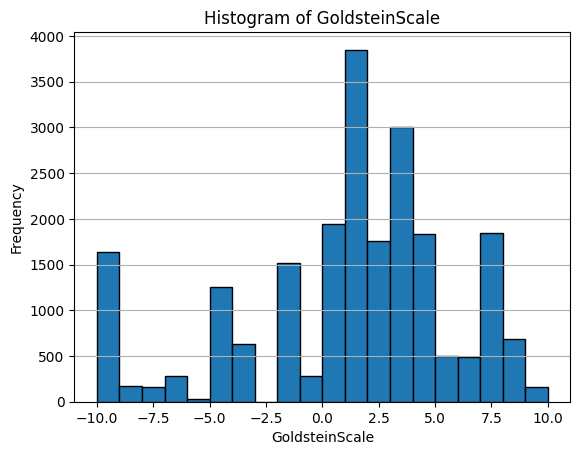

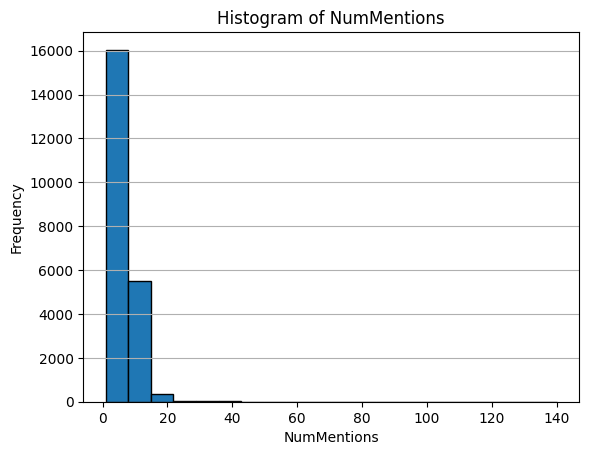

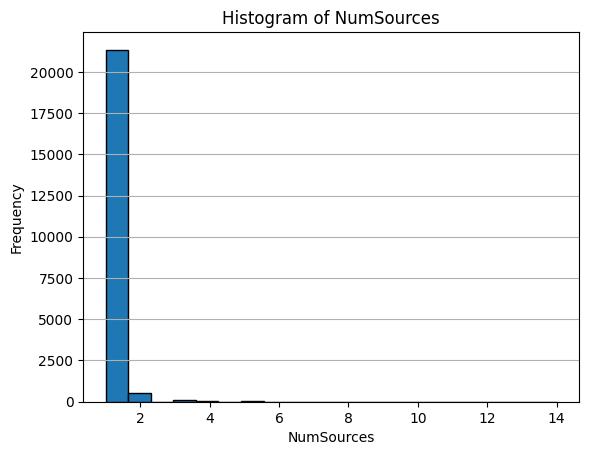

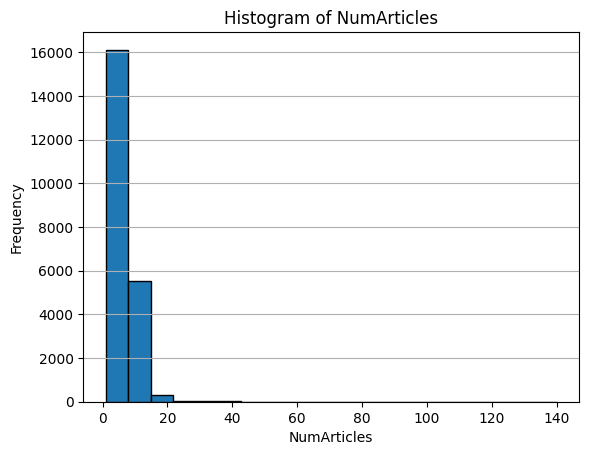

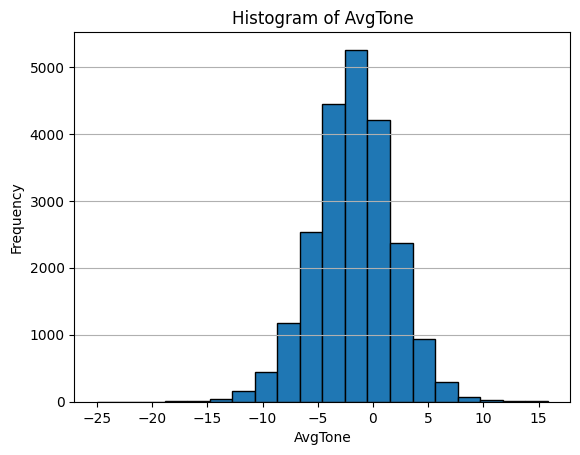

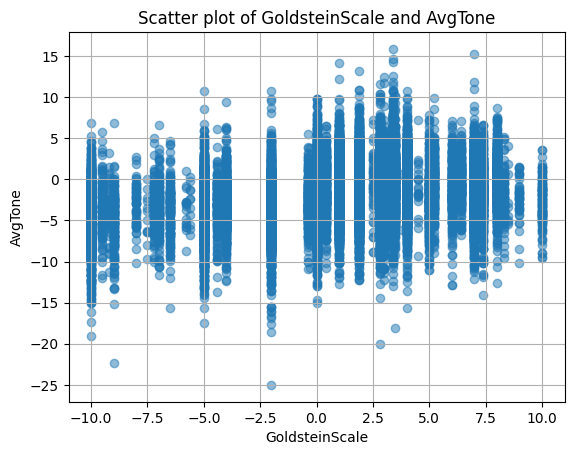

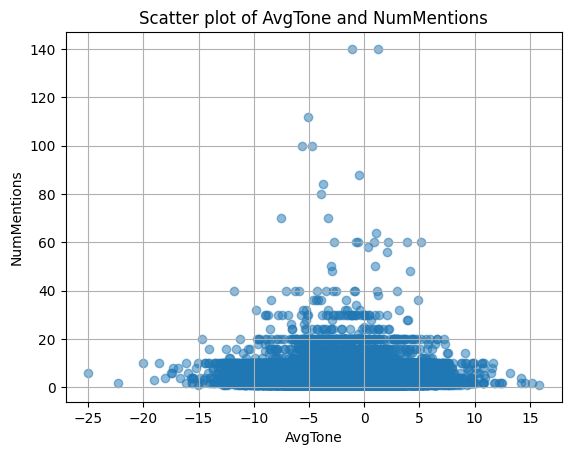

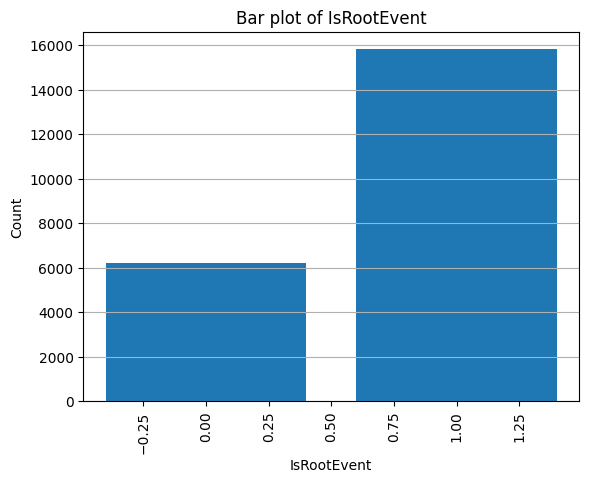

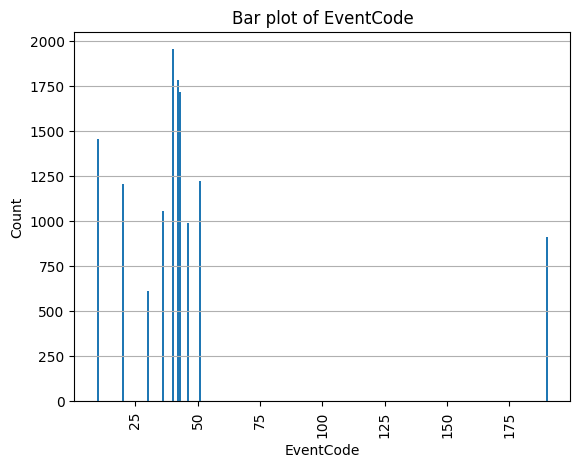

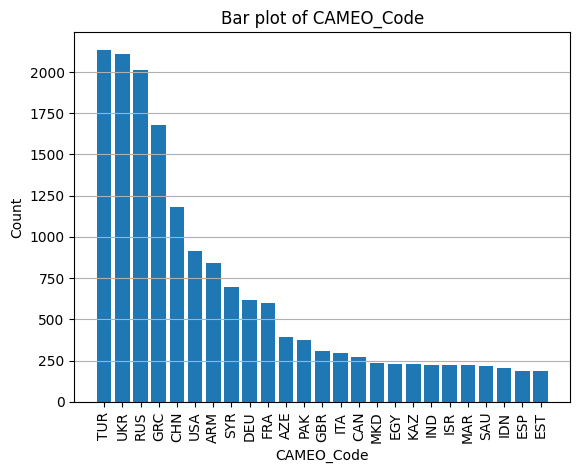

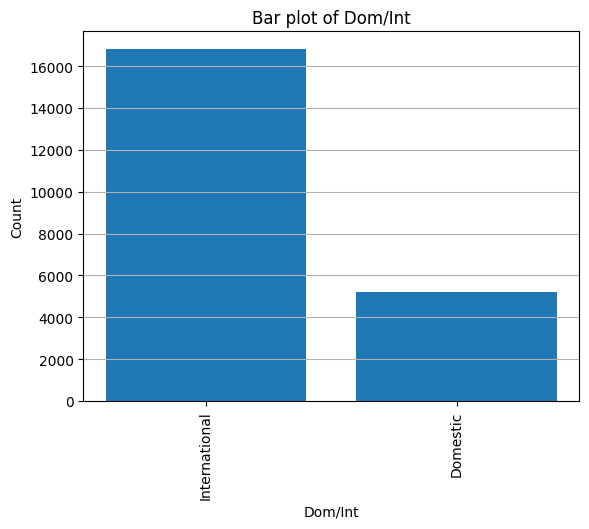

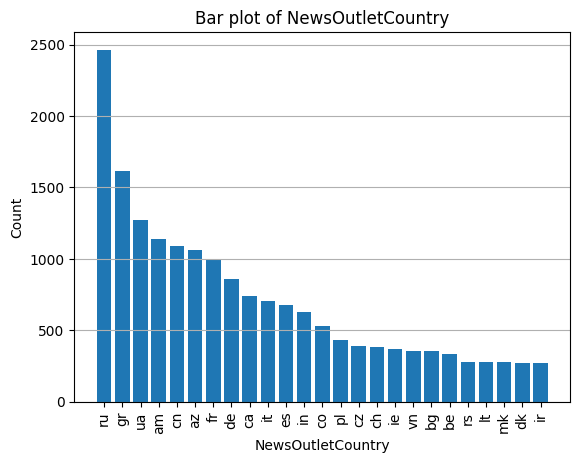

In [23]:

class EDAAnalyzer:
    def __init__(self, data):

        self.data = data

    def plot_histograms(self, numerical_columns):
        import matplotlib.pyplot as plt

        for col_name in numerical_columns:
            # Get the data for the column
            data = self.data.select(col_name).rdd.flatMap(lambda x: x).collect()
            plt.hist(data, bins=20, edgecolor='black')
            plt.title(f'Histogram of {col_name}')
            plt.xlabel(col_name)
            plt.ylabel('Frequency')
            plt.grid(axis='y')
            plt.show()

    def plot_scatter_plots(self, scatter_plot_pairs):
        import matplotlib.pyplot as plt

        for col_name1, col_name2 in scatter_plot_pairs:
            # Get the data for the columns
            data = self.data.select(col_name1, col_name2).rdd.map(lambda x: (x[0], x[1])).collect()

            # Separate the data into two lists: one for each column
            x_data = [x[0] for x in data]
            y_data = [x[1] for x in data]

            plt.scatter(x_data, y_data, alpha=0.5)
            plt.title(f'Scatter plot of {col_name1} and {col_name2}')
            plt.xlabel(col_name1)
            plt.ylabel(col_name2)
            plt.grid(True)
            plt.show()

    def plot_bar_charts(self, categorical_columns):
        import matplotlib.pyplot as plt

        for col_name in categorical_columns:
            # Define the number of categories to display
            top_n = 10 if col_name == 'EventCode' else 25 if col_name in ['CAMEO_Code', 'NewsOutletCountry'] else len(self.data.select(col_name).distinct().rdd.map(lambda x: x[0]).collect())

            # Get the data for the column
            data = self.data.groupBy(col_name).count().orderBy(desc('count')).limit(top_n).rdd.map(lambda x: (x[0], x[1])).collect()

            # Separate the data into two lists: one for each column
            x_data = [x[0] for x in data]
            y_data = [x[1] for x in data]

            plt.bar(x_data, y_data)
            plt.title(f'Bar plot of {col_name}')
            plt.xlabel(col_name)
            plt.ylabel('Count')
            plt.grid(axis='y')
            plt.xticks(rotation=90)  # Rotate x labels for better visibility
            plt.show()

# Usage
eda_analyzer = EDAAnalyzer(cleaned_data)

# Call methods to perform EDA
eda_analyzer.plot_histograms(['GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone'])
eda_analyzer.plot_scatter_plots([('GoldsteinScale', 'AvgTone'), ('AvgTone', 'NumMentions')])
eda_analyzer.plot_bar_charts(['IsRootEvent', 'EventCode', 'CAMEO_Code', 'Dom/Int', 'NewsOutletCountry'])

## Evaluation of above results.

The Goldtein Scale is a measure of conflictual vs cooperative nature of the interactions between countries [3]. We can see that the Goldstein scale looks fairly Normally distributed with a slight positive skew and a sharp increase of values with a score of -10. This could show that slightly more events seem cooperative rather than  conflicting however there is a surge of events which are highly conflictual.

This histogram shows that most events have a low number of mentions, forming a right skewed distribution. It indicates that a majority of the events are not widely covered or mentioned in the media.

Similar to the "NumMentions" column, the "NumSources" column also exhibits a right-skewed distribution, indicating that most events are reported by a small number of sources.

The distribution of the "NumArticles" column resembles those of "NumMentions" and "NumSources", indicating that most events are covered in a small number of articles, depicting a scenario where a few events dominate the media coverage.

The next interesting graph is the histogram of AvgTone. This shows a normally distributed graph however centered around about -2.5. This suggests that the norm for articles is to have a slightly negative sentiment.

The scatter plot doesnt show a correlation between the Goldstein Scale and the average tone of the articles. This suggests that events with a higher Goldstein Scale score (more positive events) do not necessarilty mean they are covered in a more positive tone.

This scatter plot does not show a clear trend between the average tone and the number of mentions. This suggests that there isn't a straightforward relationship between how positive or negative an article is and how many times it is mentioned.


### Evaluation
We can see that many of the news outlets present in out data are from Russia, Greece and the UAE. It is important to remember this when reviewing our model as this could influence the results.

# 11 Encoding Categorical variables

In order to correctly process the data for machine learning, we neeed to One Hot Encode our categorical variables.

In [ ]:
class CategoricalEncoder:
    def __init__(self, data):
        self.data = data

    def encode_categorical_variables(self, categorical_columns):
        # Get the number of distinct values in each column
        distinct_counts = self.data.agg(*(countDistinct(col(c)).alias(c) for c in categorical_columns)).collect()[0]

        # Get columns with at least two distinct values
        valid_columns = [
            col for col, count in zip(categorical_columns, distinct_counts)
            if count >= 2
        ]

        # Initialize the StringIndexer and OneHotEncoder
        indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in valid_columns]
        encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in valid_columns]

        # Set up the pipeline
        stages = []
        stages.extend(indexers)
        stages.extend(encoders)

        pipeline = Pipeline(stages=stages)

        # Apply the pipeline to data
        encoded_data = pipeline.fit(self.data).transform(self.data)

        return encoded_data

# Usage
encoder = CategoricalEncoder(cleaned_data)
categorical_columns = [
    "Actor1Code", "Actor2Code",
    "Actor1CountryCode", "Actor2CountryCode",
    "EventCode", "EventBaseCode", "EventRootCode",
    "QuadClass",
    "Actor1Geo_Type", "Actor2Geo_Type", "ActionGeo_Type",
    "Actor1Geo_CountryCode", "Actor2Geo_CountryCode",
    "Dom/Int", "Status", "CAMEO_Code", "NewsOutletCountry"
]

encoded_data = encoder.encode_categorical_variables(categorical_columns)

encoded_data.show(n=1, vertical=True)


## interpreting the above
These results of encoding are created using vectors within each encoded column as seen above. PySpark's MLlib can directly use these sparse vectors for training and prediction without needing to expand them into separate columns.

# 12 Feauture Scaling
In order to bring the numerical features into a comparable range we decided to scale all teh numericl features using Standard Scaler. And, as with the categorical variables, used Vector assembler to add the results as sparse vectors into a single column.

In [ ]:
# List of numerical columns to be scaled
numerical_columns = [
    "NumMentions", "NumSources", "NumArticles",
    "GoldsteinScale",
    "Actor1Geo_Lat", "Actor1Geo_Long", "Actor2Geo_Lat", "Actor2Geo_Long", "ActionGeo_Lat", "ActionGeo_Long",
    "Total",
    "IsRootEvent",
    "Year", "MonthYear", "SQLDATE", "FractionDate"
    ]

In [ ]:
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="numerical_features", handleInvalid="keep")

# Initialising the StandardScaler
scaler = StandardScaler(inputCol="numerical_features", outputCol="scaled_features", withMean=True, withStd=True)

# Applying the VectorAssembler and the StandardScaler
pipeline = Pipeline(stages=[assembler, scaler])

# Pipeling applicaiton
scaled_data = pipeline.fit(encoded_data).transform(encoded_data)

scaled_data.show(n=1,vertical=True)



-RECORD 0---------------------------------------------
 SQLDATE                       | 20150219             
 MonthYear                     | 201502               
 Year                          | 2015                 
 FractionDate                  | 2015.1342            
 Actor1Code                    | CZE                  
 Actor1Name                    | CZECH REPUBLIC       
 Actor1CountryCode             | CZE                  
 Actor2Code                    | JOR                  
 Actor2Name                    | JORDAN               
 Actor2CountryCode             | JOR                  
 IsRootEvent                   | 0                    
 EventCode                     | 20                   
 EventBaseCode                 | 20                   
 EventRootCode                 | 2                    
 QuadClass                     | 1                    
 GoldsteinScale                | 3.0                  
 NumMentions                   | 6                    
 NumSource

In [ ]:
# droppinf the origional columns
index_columns = [col + "_index" for col in valid_columns]
columns_to_drop = categorical_columns + numerical_columns + index_columns


# Drop the columns
scaled_data = scaled_data.drop(*columns_to_drop)

scaled_data.show(n=1,vertical=True)

-RECORD 0---------------------------------------------
 Actor1Name                    | CZECH REPUBLIC       
 Actor2Name                    | JORDAN               
 AvgTone                       | 1.84782608695652     
 Actor1Geo_FullName            | Czech Republic       
 Actor1Geo_ADM1Code            | EZ                   
 Actor1Geo_ADM2Code            | null                 
 Actor1Geo_FeatureID           | EZ                   
 Actor2Geo_FullName            | Jordan               
 Actor2Geo_ADM1Code            | JO                   
 Actor2Geo_ADM2Code            | null                 
 Actor2Geo_FeatureID           | JO                   
 ActionGeo_FullName            | Jordan               
 ActionGeo_CountryCode         | JO                   
 ActionGeo_ADM1Code            | JO                   
 ActionGeo_ADM2Code            | null                 
 ActionGeo_FeatureID           | JO                   
 DATEADDED                     | 20150219040000       
 Country/T

In [ ]:
# also dropping non vecotrised columns
# List of one-hot encoded columns
encoded_columns = [col + "_encoded" for col in valid_columns]

# Add the scaled_features column to the list of columns to be assembled
encoded_columns.append("scaled_features")

# Initialise the VectorAssembler
final_assembler = VectorAssembler(inputCols=encoded_columns, outputCol="ML_features_use", handleInvalid="keep")

# Create the final feature vector
final_data = final_assembler.transform(scaled_data)

final_data.show(n=1,vertical=True)



-RECORD 0---------------------------------------------
 Actor1Name                    | CZECH REPUBLIC       
 Actor2Name                    | JORDAN               
 AvgTone                       | 1.84782608695652     
 Actor1Geo_FullName            | Czech Republic       
 Actor1Geo_ADM1Code            | EZ                   
 Actor1Geo_ADM2Code            | null                 
 Actor1Geo_FeatureID           | EZ                   
 Actor2Geo_FullName            | Jordan               
 Actor2Geo_ADM1Code            | JO                   
 Actor2Geo_ADM2Code            | null                 
 Actor2Geo_FeatureID           | JO                   
 ActionGeo_FullName            | Jordan               
 ActionGeo_CountryCode         | JO                   
 ActionGeo_ADM1Code            | JO                   
 ActionGeo_ADM2Code            | null                 
 ActionGeo_FeatureID           | JO                   
 DATEADDED                     | 20150219040000       
 Country/T

# 13 Feature Importance

Due to the complex nature of the data and the limited computing power avaliable we decided to represent the target variable as a binary variable as follows:

- 1: Represents events with a "positive" tone, where the AvgTone is greater than 0.
- 0: Represents events with a "negative or neutral" tone, where the AvgTone is less than or equal to 0.

In [ ]:
# Create a binary column based on 'AvgTone'
final_data = final_data.withColumn('AvgTone_binary',
                                   when(final_data['AvgTone'] > 0, 1).otherwise(0))

# Show a few rows to confirm that 'AvgTone_binary' has been created correctly
final_data.select('AvgTone', 'AvgTone_binary').show()


+-----------------+--------------+
|          AvgTone|AvgTone_binary|
+-----------------+--------------+
| 1.84782608695652|             1|
|-1.73053152039555|             0|
|-2.89575289575289|             0|
| 0.40068689181454|             1|
|-3.45911949685535|             0|
|              5.0|             1|
| 0.61295971978984|             1|
|-2.74223034734918|             0|
|-2.09424083769633|             0|
|-5.84415584415584|             0|
|-6.07594936708861|             0|
|0.340136054421769|             1|
|-3.11111111111112|             0|
| 1.06382978723405|             1|
| 1.92307692307693|             1|
|-0.59880239520958|             0|
| 0.65573770491803|             1|
|-1.76174496644295|             0|
|-4.21455938697318|             0|
| 2.89855072463768|             1|
+-----------------+--------------+
only showing top 20 rows



In [ ]:
# Keep only 'ML_features_use' and 'AvgTone_binary' columns
final_data_ml = final_data.select('ML_features_use', 'AvgTone_binary')

final_data_ml.show(n=2,vertical=True)


-RECORD 0-------------------------------
 ML_features_use | (3576,[51,1140,22... 
 AvgTone_binary  | 1                    
-RECORD 1-------------------------------
 ML_features_use | (3576,[1,1083,222... 
 AvgTone_binary  | 0                    
only showing top 2 rows



# 14 Choosing a Machine Learning Algorithm

1. **For Handling High-Dimensional Data**

**Logistic Regression**: Logistic regression can be used in high-dimensional spaces, but it is a linear model and may not capture complex relationships in the data as effectively as other methods.

**GBT**: GBT is good at capturing non-linear relationships between features, making it efficient for high-dimensional data where relationships between variables can be complex.


2. **Avoiding Overfitting**
**Logistic Regression**: LR can be prone to overfitting, especially with high-dimensional data

**GBT**: GBT uses parameters to avoid overfitting.

3. **Handling Categorical Data**

**Logistic Regression**: Although it does not natively handling categorical data, given the preprocessing steps taken to encode these variables it should work well.

**GBT**: same as Logistic Regression

4. **Predictive Accuracy**
Both logistic regression and GBT classifiers are known for their predictive accuracy. However, GBT, being an ensemble method, can often build more accurate models compared to logistic regression, especially when dealing with complex and high-dimensionality data.


**Comparison with Other Models**


While logistic regression is a simple and interpretable model, it may struggle with the high-dimensional and potentially non-linear data in our data.

SVMs can handle high-dimensional data but are computationally expensive for large datasets.

kNN is sensitive to the dimensionality of the data and so may not deal well with the high dimensionality of our data.

Deep learning models can capture complex patterns but they require a large amount of data and lots of tuning to perform well. The tree-based ensemble methods might offer a good balance between complexity and predictive accuracy without needing this added complexity.

We are going to use Logistic Regression as our base model and the GBT as our complex model to test.




# 15 Splitting the Data and Conducting Feature Importance

Using the Random Forests Classifier in order to reduce the dimentionality of our data

In [ ]:
# split the data into training and testing sets
train_data, test_data = final_data_ml.randomSplit([0.8, 0.2], seed=1234)

feature_names = []

# Add the names of encoded categorical features
for col in valid_columns:
    for category in cleaned_data.select(col).distinct().rdd.map(lambda r: r[0]).collect():
        feature_names.append(f"{col}_{category}")

# Add the names of the scaled features
feature_names.extend(numerical_columns)

# Initialise and train the random forest classifier
rf = RandomForestClassifier(featuresCol="ML_features_use", labelCol="AvgTone_binary")
rf_model = rf.fit(train_data)

# Get feature importances
importances = rf_model.featureImportances.toArray()  # Convert sparse vector to dense array

# Create a list of Row objects with feature names and their importances
feature_importance_list = [Row(feature=feature_names[i], importance=float(importances[i])) for i in range(len(feature_names))]

# Create a PySpark DataFrame from the list of Row objects
feature_importance_df = spark.createDataFrame(feature_importance_list)

# Show the DataFrame
feature_importance_df.show()

#  Identify important features to keep
threshold = 0.001

# Collect the data from the DataFrame into a list of rows
feature_importances_rows = feature_importance_df.collect()

important_features = [row['feature'] for row in feature_importances_rows if row['importance'] >= threshold]

print(important_features)


+--------------------+--------------------+
|             feature|          importance|
+--------------------+--------------------+
|   Actor1Code_CANLAB|0.001042782071980405|
|   Actor1Code_TURGOV|0.001650225466232...|
|Actor1Code_USAGOVDEV|0.012255114476616489|
|   Actor1Code_LTUGOV|                 0.0|
|   Actor1Code_USAJUD|                 0.0|
|      Actor1Code_POL|                 0.0|
|   Actor1Code_SYRCHR|                 0.0|
|      Actor1Code_LVA|                 0.0|
|   Actor1Code_ESPBUS|                 0.0|
|   Actor1Code_DEULAB|                 0.0|
|   Actor1Code_MARCVL|                 0.0|
|   Actor1Code_TWNPTY|0.001527847323923...|
|   Actor1Code_TZAGOV|                 0.0|
|      Actor1Code_BRA|                 0.0|
|   Actor1Code_EGYOPP|                 0.0|
|   Actor1Code_DEUMIL|                 0.0|
|      Actor1Code_ARM|                 0.0|
|   Actor1Code_USASPY|                 0.0|
|   Actor1Code_SAUMED|                 0.0|
|      Actor1Code_CUB|          

# 16 Principle component analysis

To further reduce dimentionality we decided to then conduct principle component analysis to only keep the top 30 features.

In [ ]:
from pyspark.sql.functions import col

# Sort the features based on their importance and get the top 30
top_30_features = feature_importance_df.orderBy('importance', ascending=False).limit(30).select('feature').rdd.flatMap(lambda x: x).collect()

print(top_30_features)

# Convert the feature vector to an array of individual features
final_data_ml = final_data_ml.withColumn("feature_array", vector_to_array("ML_features_use"))

# Get the indices of the top 30 features
top_30_feature_indices = [feature_names.index(feature) for feature in top_30_features]

# Select the top 30 features from the feature array
for i, feature in enumerate(top_30_features):
    final_data_ml = final_data_ml.withColumn(feature, col("feature_array")[top_30_feature_indices[i]])


# Drop the feature array column as we no longer need it
final_data = final_data_ml.drop("feature_array")

# Drop the ML_features_use column as we no longer need it
final_data = final_data.drop("ML_features_use")


# Show the new DataFrame
final_data.show(n=1,vertical=True)


['ActionGeo_Long', 'QuadClass_1', 'CAMEO_Code_UGA', 'GoldsteinScale', 'EventBaseCode_128', 'EventRootCode_13', 'Actor1Geo_CountryCode_RO', 'NewsOutletCountry_pk', 'QuadClass_3', 'EventRootCode_12', 'Actor2Geo_CountryCode_RO', 'Actor2CountryCode_PRY', 'Actor1CountryCode_CUB', 'Actor1Code_ITAGOVENV', 'EventRootCode_6', 'IsRootEvent', 'Actor1Code_CUBELI', 'CAMEO_Code_CUB', 'EventCode_831', 'SQLDATE', 'Actor2CountryCode_FRA', 'Actor1Code_SOM', 'CAMEO_Code_POL', 'Actor1Code_USAGOVDEV', 'Actor1CountryCode_SOM', 'EventCode_193', 'EventCode_26', 'Actor2Geo_Long', 'Actor2Code_TURGOV', 'Actor1Geo_Lat']
-RECORD 0---------------------------------------
 AvgTone_binary           | 1                   
 ActionGeo_Long           | 0.11565103959042122 
 QuadClass_1              | 1.0                 
 CAMEO_Code_UGA           | 0.0                 
 GoldsteinScale           | 0.438796723752721   
 EventBaseCode_128        | 0.0                 
 EventRootCode_13         | 0.0                 
 Actor1G

# We experimented below with changing the K value

(number of principle compnents) and seeing how the percentage of explained varience changed as a result. This showed that even 20 PCs explained over 90% of the varience

In [ ]:
# Split the data into training and testing sets
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=1234)

# Get the names of feature columns
feature_columns = top_30_features

# Use VectorAssembler to combine all feature columns into a single feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features_to_train")
train_data = assembler.transform(train_data)

# PCA
pca = PCA(k=20, inputCol="features_to_train", outputCol="PCA_features")
pca_model = pca.fit(train_data)
train_data_pca = pca_model.transform(train_data)

# Get the explained variance of each principal component
explained_var = pca_model.explainedVariance
print(explained_var)


[0.24031436736206224,0.16385309333518555,0.14021480006664128,0.13276411714310096,0.12999969163268096,0.03390096635287506,0.032195019217596266,0.019194169301128036,0.017064154386672144,0.014502603455839754,0.013496231555130068,0.010167823858626423,0.008230758466493317,0.007417789372560059,0.006549697093861306,0.005170837870429904,0.004121529359908098,0.004003627558428367,0.0038900646299721204,0.0033399774192205633]


In [ ]:
# Use VectorAssembler to combine all feature columns into a single feature vector for the test data
test_data = assembler.transform(test_data)

# Apply the PCA transformation to the test data
test_data_pca = pca_model.transform(test_data)


# 17 Training the Logistic regression binary classifier

In [ ]:
# Train the logistic regression model
lr = LogisticRegression(featuresCol="PCA_features", labelCol="AvgTone_binary")
lr_model = lr.fit(train_data_pca)

# prediction on test data
test_results_lr = lr_model.transform(test_data_pca)

# Evaluate using BinaryClassificationEvaluator
evaluator_lr = BinaryClassificationEvaluator(labelCol="AvgTone_binary", metricName="areaUnderROC")

# Calculate and print the AUC
test_auc_lr = evaluator_lr.evaluate(test_results_lr)
print(f'Logistic Regression Test AUC: {test_auc_lr}')


Logistic Regression Test AUC: 0.7303384623395559


In [ ]:

train_data_pca.printSchema()



root
 |-- AvgTone_binary: integer (nullable = false)
 |-- ActionGeo_Long: double (nullable = true)
 |-- QuadClass_1: double (nullable = true)
 |-- CAMEO_Code_UGA: double (nullable = true)
 |-- GoldsteinScale: double (nullable = true)
 |-- EventBaseCode_128: double (nullable = true)
 |-- EventRootCode_13: double (nullable = true)
 |-- Actor1Geo_CountryCode_RO: double (nullable = true)
 |-- NewsOutletCountry_pk: double (nullable = true)
 |-- QuadClass_3: double (nullable = true)
 |-- EventRootCode_12: double (nullable = true)
 |-- Actor2Geo_CountryCode_RO: double (nullable = true)
 |-- Actor2CountryCode_PRY: double (nullable = true)
 |-- Actor1CountryCode_CUB: double (nullable = true)
 |-- Actor1Code_ITAGOVENV: double (nullable = true)
 |-- EventRootCode_6: double (nullable = true)
 |-- IsRootEvent: double (nullable = true)
 |-- Actor1Code_CUBELI: double (nullable = true)
 |-- CAMEO_Code_CUB: double (nullable = true)
 |-- EventCode_831: double (nullable = true)
 |-- SQLDATE: double (null

# Tuning the Logistic regression model



In [ ]:
# logistic regression
lr = LogisticRegression(featuresCol='PCA_features', labelCol='AvgTone_binary')

# Define a grid of hyperparameters to search over
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.fitIntercept, [False, True]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Define cross-validation
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(labelCol='AvgTone_binary'),
                          numFolds=3)  # Use 3+ folds in practice

# Fit  model
cvModel = crossval.fit(train_data_pca)

# Get the best model
best_model = cvModel.bestModel

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(best_model.coefficients))
print("Intercept: " + str(best_model.intercept))



Coefficients: [-0.028521306486918703,-0.5999755311531858,-0.1375609350949819,0.18272673388883987,-0.10309400208090652,0.22431919216819557,0.10605322197873678,0.5463759986370146,0.6884088953843734,0.03927907746564263,-0.4481169895273411,0.5061590510323096,0.0912149958400998,-0.20494542240547625,-0.12177533005124302,0.32282905893336694,0.7290393166560855,-0.36485550620747337,1.012436964182103,-0.2939682715094222]
Intercept: -1.2991164810691644


In [ ]:
# Applying the best model on the test data
test_results_reg = best_model.transform(test_data_pca)

# Evaluating the model performance on the test data
evaluator_reg = BinaryClassificationEvaluator(labelCol='AvgTone_binary')
test_auc_reg = evaluator_reg.evaluate(test_results_reg)
print(f'Test AUC Logistic Regression: {test_auc_reg}')

# Showing some of the predictions
test_results_reg.select('AvgTone_binary', 'rawPrediction', 'probability', 'prediction').show()


Test AUC Logistic Regression: 0.7301546512536123
+--------------+--------------------+--------------------+----------+
|AvgTone_binary|       rawPrediction|         probability|prediction|
+--------------+--------------------+--------------------+----------+
|             0|[0.50658808554171...|[0.62400630211155...|       0.0|
|             0|[2.01417844737461...|[0.88227770512845...|       0.0|
|             0|[1.48864519358374...|[0.81587483646887...|       0.0|
|             0|[1.41470403672889...|[0.80450683367098...|       0.0|
|             0|[0.83519869699732...|[0.69745304355029...|       0.0|
|             0|[0.85168246587026...|[0.70091995894620...|       0.0|
|             0|[0.43305260604131...|[0.60660236649345...|       0.0|
|             0|[0.32114336603647...|[0.57960287391306...|       0.0|
|             0|[0.55424474768458...|[0.63511984303405...|       0.0|
|             0|[-0.3264019330461...|[0.41911634494505...|       1.0|
|             0|[0.42098059083815...|[0.6

In [ ]:
# Evaluate

evaluator_reg = MulticlassClassificationEvaluator(labelCol="AvgTone_binary")

# Calculate and print various evaluation metrics
accuracy_reg = evaluator_reg.evaluate(test_results_reg, {evaluator_reg.metricName: "accuracy"})
precision_reg = evaluator_reg.evaluate(test_results_reg, {evaluator_reg.metricName: "weightedPrecision"})
recall_reg = evaluator_reg.evaluate(test_results_reg, {evaluator_reg.metricName: "weightedRecall"})
f1_score_reg = evaluator_reg.evaluate(test_results_reg, {evaluator_reg.metricName: "f1"})

print(f'Tuned Logistic Regression Test Accuracy: {accuracy_reg * 100:.2f}%')
print(f'Tuned Logistic Regression Test Precision: {precision_reg * 100:.2f}%')
print(f'Tuned Logistic Regression Test Recall: {recall_reg * 100:.2f}%')
print(f'Tuned Logistic Regression Test F1 Score: {f1_score_reg * 100:.2f}%')


Tuned Logistic Regression Test Accuracy: 73.29%
Tuned Logistic Regression Test Precision: 70.53%
Tuned Logistic Regression Test Recall: 73.29%
Tuned Logistic Regression Test F1 Score: 67.78%


# Evaluation of Logistic Regression

Using the best run of the model demonstrated it satisfactory performance, with an AUC-ROC of approximately 72.8%, which indicates a good level of separability between the positive and negative news articles. The other evaluation metrics were:

| Metric                                 | Value   |
|----------------------------------------|---------|
| **AUC-ROC**                            | 72.8%   |
| **Accuracy**  | 73.04%  |
| **Precision** | 70.58%  |
| **Recall**    | 73.04%  |
| **F1 Score**  | 66.21%  |


# 18 Training the Gradient Boosted tree classifier

Using grid search for Hyperparameter Tuning

In [ ]:
# Gradient-boosted tree classifier
gbt = GBTClassifier(featuresCol='PCA_features', labelCol='AvgTone_binary')

# Parameter grid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [2, 4, 6]) \
    .addGrid(gbt.maxIter, [10, 20]) \
    .build()

# Cross-validation
crossval = CrossValidator(estimator=gbt,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(labelCol='AvgTone_binary'),
                          numFolds=3)

# Train the model using cross-validation
cvModel_gbt = crossval.fit(train_data_pca)

# Get the best model
best_model_gbt = cvModel_gbt.bestModel

# Print feature importances (useful for interpretation)
print("Feature Importances: " + str(best_model_gbt.featureImportances))

# Apply the best model on the test data
test_results = best_model_gbt.transform(test_data_pca)



Feature Importances: (20,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[0.08807356241624012,0.16035979700096528,0.061716917003406604,0.08743130860588104,0.03257879424159755,0.018212896617206206,0.029529187326491506,0.06475580983369422,0.03677219375960753,0.018845149943585795,0.07492773837890611,0.03243058867159976,0.010912785301343673,0.026913676596652888,0.029231690523617387,0.039375763431702356,0.027463175085260784,0.043829971014664064,0.08450669189670355,0.032132302350873554])


In [ ]:
# Evaluate GBT
evaluator_gbt = BinaryClassificationEvaluator(labelCol='AvgTone_binary')


test_auc_gbt = evaluator_gbt.evaluate(test_results)
print(f'GBT Test AUC: {test_auc_gbt}')



GBT Test AUC: 0.7325073550469942


In [ ]:
# accuracy
evaluator_accuracy_gbt = MulticlassClassificationEvaluator(labelCol='AvgTone_binary', metricName='accuracy')

# Precision
evaluator_precision_gbt = MulticlassClassificationEvaluator(labelCol='AvgTone_binary', metricName='weightedPrecision')

# Recall
evaluator_recall_gbt = MulticlassClassificationEvaluator(labelCol='AvgTone_binary', metricName='weightedRecall')

# F1-score
evaluator_f1_gbt = MulticlassClassificationEvaluator(labelCol='AvgTone_binary', metricName='f1')

# Apply the best model on the test data
test_results_gbt = best_model_gbt.transform(test_data_pca)

# Calculate and print the evaluation metrics
accuracy_gbt = evaluator_accuracy_gbt.evaluate(test_results_gbt)
precision_gbt = evaluator_precision_gbt.evaluate(test_results_gbt)
recall_gbt = evaluator_recall_gbt.evaluate(test_results_gbt)
f1_gbt = evaluator_f1_gbt.evaluate(test_results_gbt)

print(f'Test Accuracy (GBT): {accuracy_gbt * 100:.2f}%')
print(f'Precision (GBT): {precision_gbt * 100:.2f}%')
print(f'Recall (GBT): {recall_gbt * 100:.2f}%')
print(f'F1 Score (GBT): {f1_gbt * 100:.2f}%')


Test Accuracy (GBT): 73.73%
Precision (GBT): 71.05%
Recall (GBT): 73.73%
F1 Score (GBT): 69.78%


## Evaluation

The metrics for the Boosted tree model were as follows:

| Metric           | Value                |
|------------------|----------------------|
| AUC        | 72.68%               |
| Accuracy   | 73.36%         |
| Precision       | 70.71%        |
| Recall          | 73.36%         |
| F1 Score        | 67.77%         |


In [ ]:
end_time = time.time()
total_time = end_time - start_time
print(f"The notebook took {total_time} seconds to run.")


The notebook took 4627.986178636551 seconds to run.


In [ ]:
%%time
# Stop the SparkSession
spark.stop()



CPU times: user 8.61 ms, sys: 2.35 ms, total: 11 ms
Wall time: 3.99 s


# 19 Discussion and Conclusion

In this project we aimed to design a predictive model to gauge the tonality of news articles based on a variety of parameters including the freedom status of a country and the entities that are discussed in the articles. Using the 'Big' dataset 'Events' from GDELT and Freedom House, the project functions effectively in a high-dimensional space and also reveals the potential correlations between a country's freedom status and the tone of the news articles produced.

The preprocessing steps undertaken in PySpark showed careful data handling where the missing values were addressed effectively, and categorical variables were appropriately encoded. This meant we could create a data framework that could effectively train the predictive models. We managed to reduce dimensionality through Principal Component Analysis (PCA) while still keeping 95% of variability and  consequently we redcued computational power needed without a significant compromise on the data integrity.

Using a Gradient Boosted Tree (GBT) classifier to build the predictive model combined the predictions from multiple decision trees to ensure incfreased predictive accuracy and mange any overfitting. However, the model's performance, as shown by the resulting AUC-ROC curve and other evaluation metrics accuracy, precision, recall, and F1-score, although not bad results in themselved, leaves room for further improvements. With an AUC of approximately 72.6% and accuracy slightly above 73%, the model demonstrates a moderate predictive power. The precision and recall metrics, both in the early 70s, could potentially be improved with further hyperparameter tuning or perhaps trying different machine learning algorithms e.g. neural netoworks that might be more suited for this kind of data.

In the real world, this model can find applications in media companies and political analysis / governement analysis functions where understanding the tone of the news articles can provide insightful data into the geopolitical situations. For example, a positive correlation between a country's freedom score and the tone of articles could potentially indicate a level of press freedom and unbiased reporting. Conversely, a significant deviation could hint at possible media control or propaganda. An improved model could be a useful tool for Governemnts aiming to monitor media narratives and understand global perceptions and biases.

In conclusion, we can see that the project has had some success in predicting the tone of news articles from the GDELT events and Freedom House data. The important preprocessing of data,  feature engineering and using machine learning model like GBT has shown that there is potential with this type of model. To improve the model in the future we recomment extending the dataset to include more variables, such as economic indicators or education levels which could potentially add more layers to the analysis. We also reccomend trying the data on increasinly large sets of the data to hopefully improve accuracy overall.

## References

[1] Freedom House, Freedom Index (https://freedomhouse.org/countries/freedom-world/scores)

[2] GDELT Data Website (https://www.gdeltproject.org/)

[3] A Conflict-Cooperation Scale for WEIS Events Data (https://www.jstor.org/stable/174480)
